<a href="https://colab.research.google.com/github/Daniellien2018/Project_1_FoodHub/blob/main/Daniel_Lien_PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis: Daniel Lien

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path = '/content/drive/My Drive/UT Austin AIML/Datasets/foodhub_order.csv'
data = pd.read_csv(path)
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
#data.shape gives rows and columns and returns in a set that is indexable
print("There are", data.shape[0], "rows and ", data.shape[1], "columns.")


There are 1898 rows and  9 columns.


#### Observations: There are 1898 rows and 9 columns present in the data



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The datatypes of the difference columns are listed below
order_id : int64  
customer_id : int64  
restaurant_name : object  
cuisine_type : object  
cost_of_the_order : float64  
day_of_the_week : object  
rating : object  
food_preparation_time : int64  
delivery_time : int64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here

#Checks data in each column for null values. Returns True if Null value, False if not null value
data.isnull()
#Sums number of null values in each coulmn of dataset. True = (1), False = (0)
data.isnull().sum()

#We see that each column has zero null values, therefore there are no missing values in the data.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: Each column of the dataset has zero null values, therefore there are no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here

# The statistical summary of the Data can be given by the .describe method
# The .T method is to transpose the given dataframe for increased readability
data.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The minimun time it takes for the food to be prepared is: 20.0 minutes  
The average time it takes for the food to be prepared is: 27.4 minutes  
The maximum time it takes for the food to be prepared is: 35.0 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

# When looking for number of orders, we can use conditional logic.
# Here we key into the data['rating'] column and compare each value with equality comparison, then take the sum with .sum() method
(data['rating'] == 'Not given').sum()

#This can also be found with .value_counts() method, which returns a series containing counts of unique values
data['rating'].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: Of the 1898 total orders, there are 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Order Id



In [ ]:
# check the unique order Id
data['order_id'].nunique()

#There are 1898 unique orders, as expected. No need for analysis

1898

### Customer Id

In [ ]:
# check the total number of unique customers
data['customer_id'].nunique()

#There are 1200 unique customers, as some customers may have multiple orders
#No need for analysis

1200

### Restaurant Name

In [ ]:
# check the total number of restaurants
data['restaurant_name'].nunique()

#There are 178 unique restaurants, as one restaurant has multiple orders and customers
#No need for analysis

178

### Cuisine Type


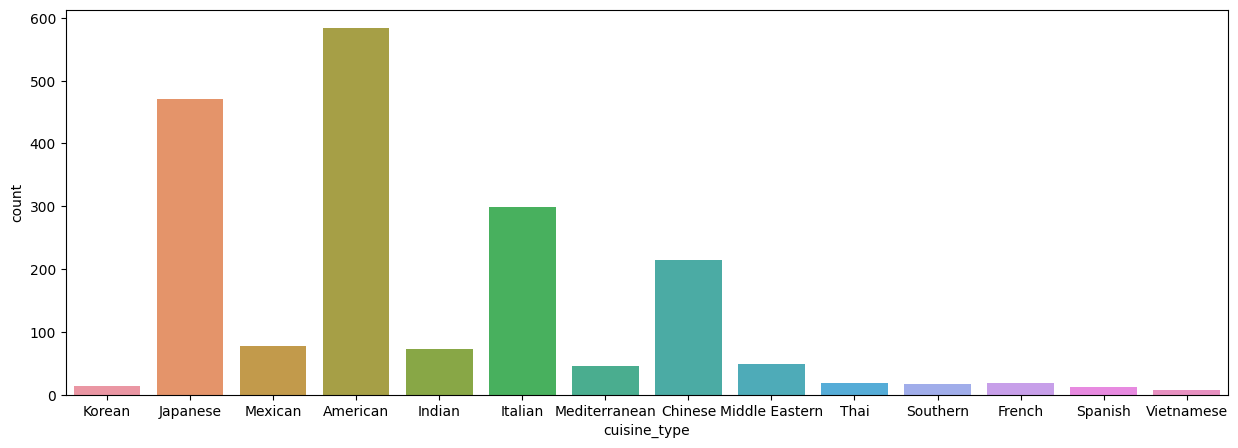

In [ ]:
# check the total number of cuisines types
data['cuisine_type'].nunique()
# There are 14 unique cuisine types

#Cuisine type is likely the first variable we can carry analysis on.

#Set figure height to a reasonable size
#   14 unique cuisine types, 15 width is reasonable

# plt.figure().set_figwidth(15)
# plt.figure().set_fighheight(5)
# or
plt.figure(figsize=(15,5))
# A count plot is a good way to measure occurences of categorical variables
sns.countplot(data=data, x='cuisine_type');

Observation: The most commonly ordered cuisine is American, with Japanese as a close second.

### Day of the Week

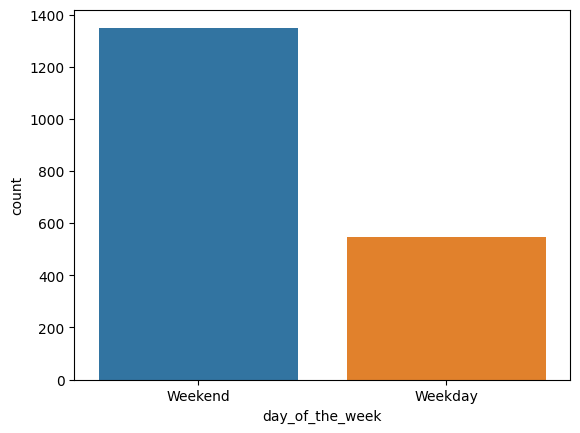

In [ ]:
# check the total number of days, in this case it will only be two; Weekday and Weekend
data['day_of_the_week'].nunique()

#A simple countplot to tell us when orders are mostly being made.
sns.countplot(data=data, x ='day_of_the_week');

Observation: Of the two choices, a majority of orders are made of the Weekend, as opposed to the Weekday.

### Rating

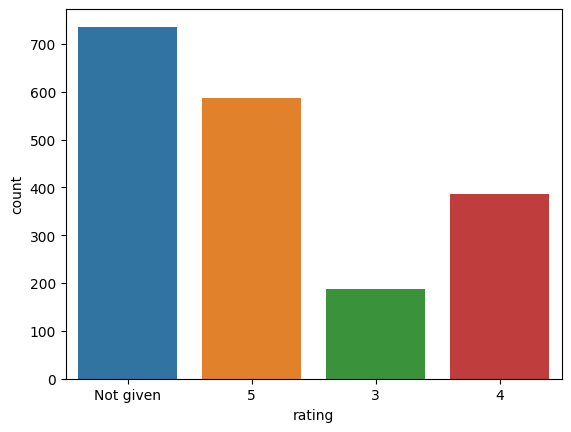

In [ ]:
#Total number of ratings that could be offered
data['rating'].nunique()

#Determine the number of each rating that was given
#Again, a bar graph is ideal for analysing categorical variables
sns.countplot(data=data, x='rating');

Observation: The most prominent category of the ratings were "Not given", but there were still a good amounnt of 5, 4, or 3 ratings.

### Food Preparation Time

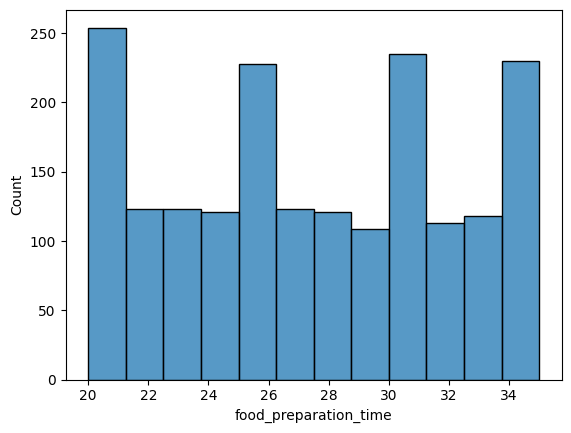

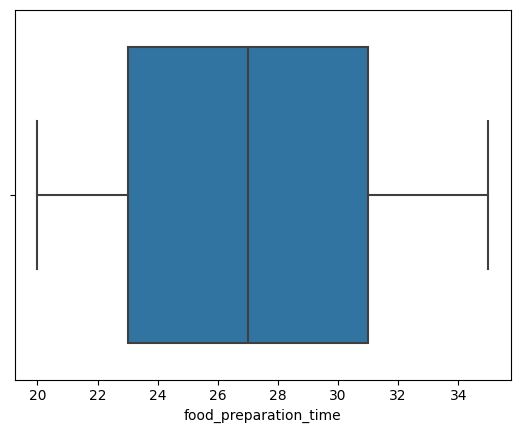

In [ ]:
# Since time is a quantative variable and not a categorical variable, we do not need to check the number of unique variables
# All variables will be given as time, but often differ in time

# We can use a histogram and a box and whisker plot to compare time.
sns.histplot(data=data, x='food_preparation_time');
plt.show()
sns.boxplot(data=data, x='food_preparation_time');
plt.show()

Observation: The median delivery time was 25 minutes.

### Food Delivery Time

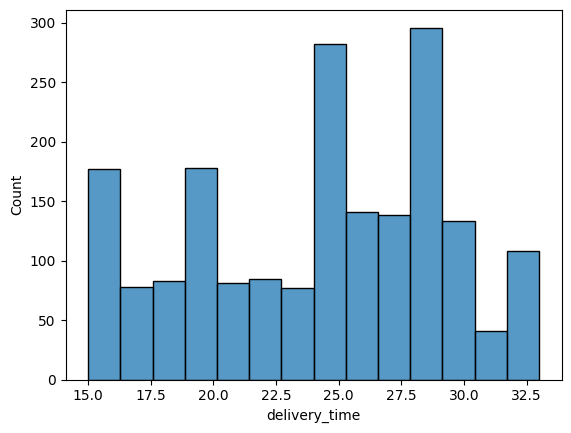

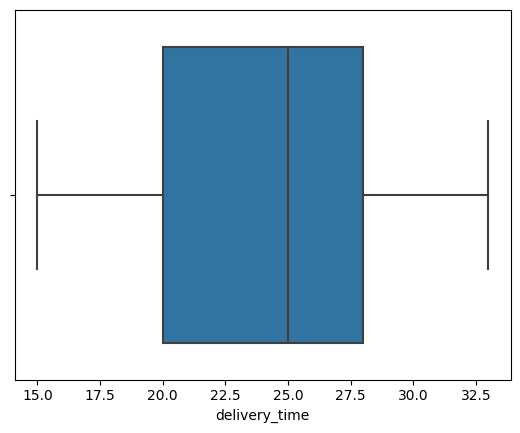

In [ ]:
#We can take the same approach as we did with Food Preparation time and apply it to Delivery time
#Still using a histogram and a box and whisker graph

sns.histplot(data=data, x='delivery_time');
plt.show()
sns.boxplot(data=data, x='delivery_time');
plt.show()



Observation: Time food preparation time was widely spread, without any real correlation. The median food preparation time is 27 minutes

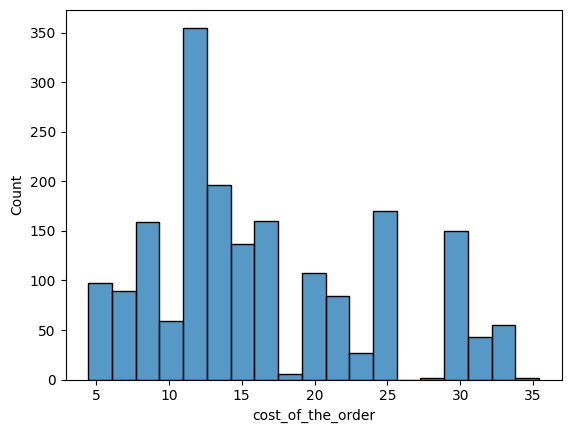

In [ ]:
sns.histplot(data=data, x='cost_of_the_order');
plt.show()

Observation: The majority of cost orders are between $10 and $15. A solid portion are over $20. There are very few orders under $5

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

#Groups data by restaurant name, aggregate with counting the number of orders associated with restaurant name
#Sort restaurants by the order_id, which is the number of different order_id's associated with restaurant
#Ascending=False = most number of orders at the top, .head(default=5) to only return top 5

# data.groupby(['restaurant_name']).count().sort_values(['order_id'],ascending=False).head()

#Can also shorthand with value_counts()method, this is better as it returns a better series
data['restaurant_name'].value_counts().head()




Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants in terms of numbers of orders received are:
-Shake Shack 219  
-The Meatball Shop 132   
-Blue Ribbon Sushi 119    
-Blue Ribbon Fried Chicken 96    
-Parm 68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

#Locate all the data which pertains to the weekend using .loc
data_weekend = data.loc[data['day_of_the_week'] == 'Weekend']

#Of resulting dataframe, check unique values, return most common with value_counts() method
data_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: The most popular cuisine on the weekends is American, with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
#.count method() returns a series of all non NA cells in column
#return dataframe with all orders > 20.0
#count order_id column to give total
data_over_20 = data[data['cost_of_the_order']> 20.0]
num_orders_above = data_over_20['order_id'].count()

#get total number of orders by using len()
total_orders = len(data['order_id'])


percentage = num_orders_above/total_orders
print(round(percentage * 100,2))



29.24


#### Observations: The percentage of orders that cost more than 20 dollars are 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
#gives the mean value of the entire column
data['delivery_time'].mean()

#can also be determined by using data.describe() method, as seen earlier


24.161749209694417

#### Observations: The mean order delivery time is 24.16 Minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Find the Id's of the customer who are most frequent customers

# Key into customer coulmn, Value_counts() gives the number of values that each unique quantity has in a coulmn
# Sort Data with ascending false just to make sure (is already defaulted to most at top)
# Return top 3 with .head() method
data['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The top three most frequent customers by Id are:
- 52832  
- 47440
- 93297


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Cuisine vs Cost Of Order

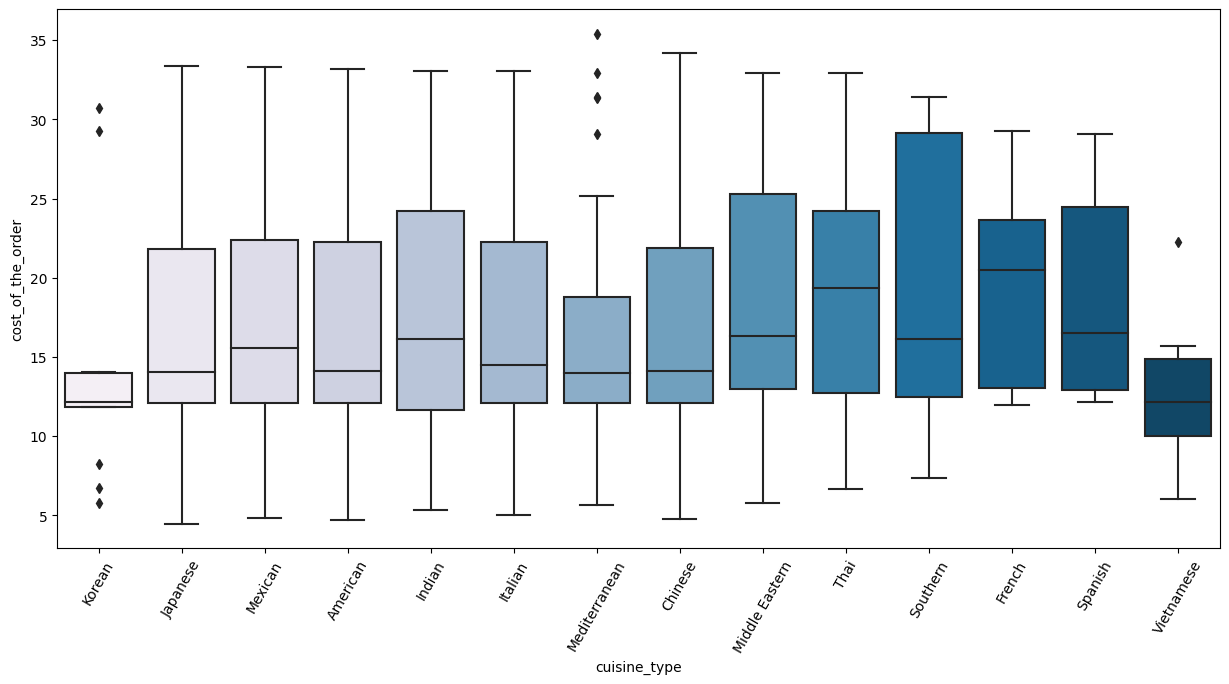

In [ ]:
#Compare Cuisine with Cost of Order, color palette for clarity
#A boxplot is good for quantitative analysis
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observation: French cuisine had the highest median cost, while Vietnamese had the lowest median cost. Korean Cuisine had very little variability while Chinese seemed to have the most variablity. Southern cuisine had the largest interquartile range.

### Cusine vs Food Preparation Time

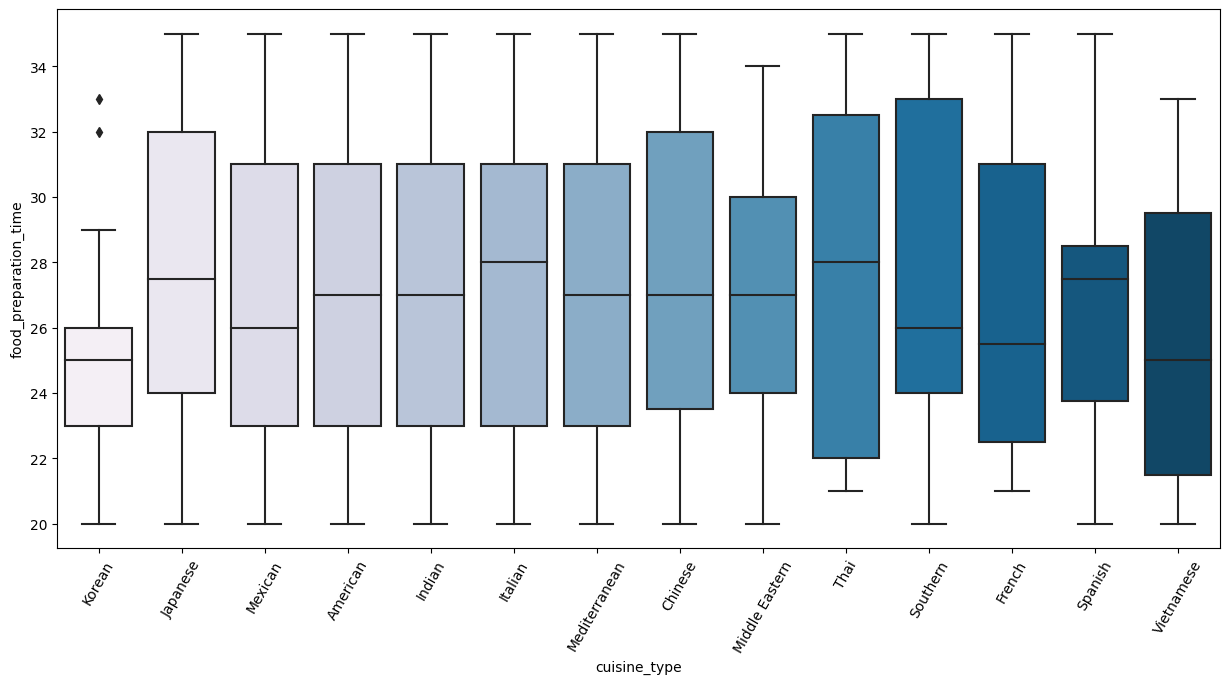

In [ ]:
#Use same approach as Cuisine vs Cost, a boxplot to show quantitative analysis
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations: Thai and Italian seem to be tied for longest median food preparation time. Vietnamese Cuisine had the shortest food preparation time

### Day of the Week vs Delivery Time

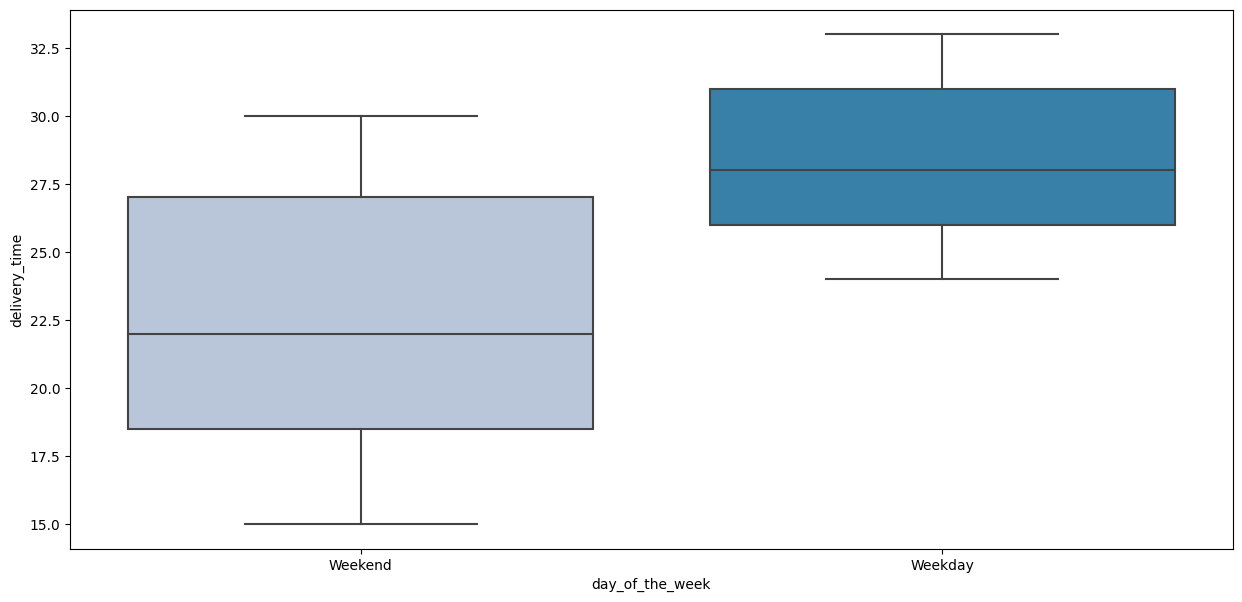

In [ ]:
#Again, use a boxplot to compare
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = data, palette = 'PuBu')
plt.show()

Observation: The median delivery time was much quicker on the Weekend than it was on the Weekday. In general, customers will receive their orders quicker on the weekend than on weekdays.

### Rating VS Delivery Time

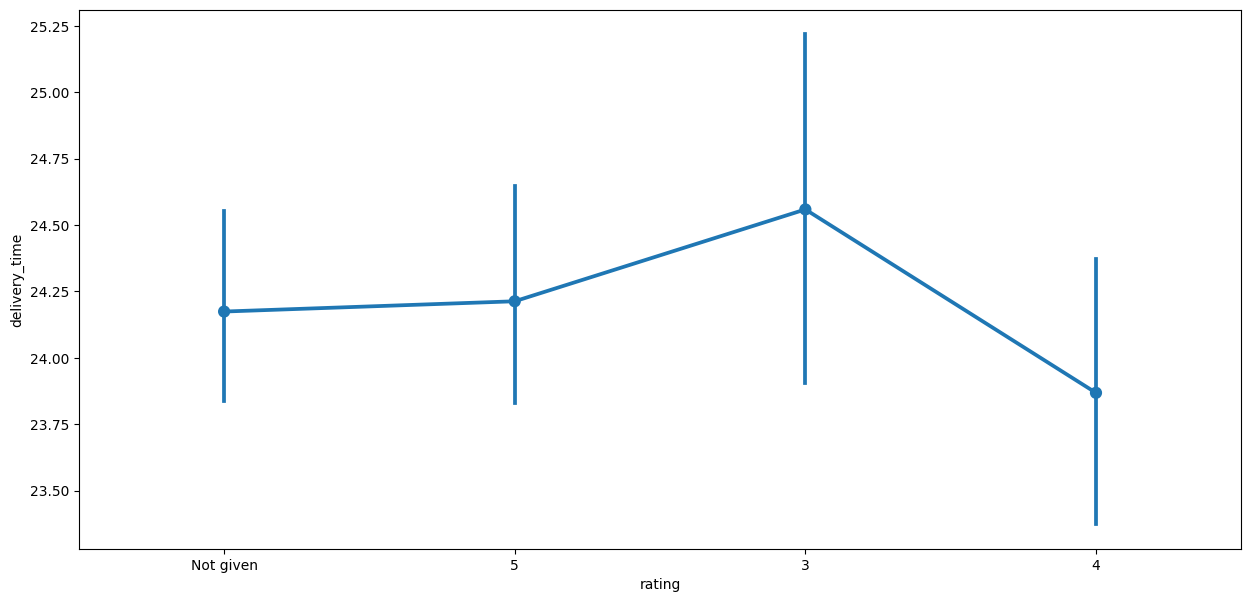

In [ ]:
#Use a point plot to compare possible correlations between two variables
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = data)
plt.show()

Observations: As the delivery time went up, the rating tended to decrease. This may not be fully reliable as quick delivery times resulted in a rating of 4, while the quickest delivery times did not result in a rating of 5. More analysis would be needed.

### Rating vs Food Preparation Time


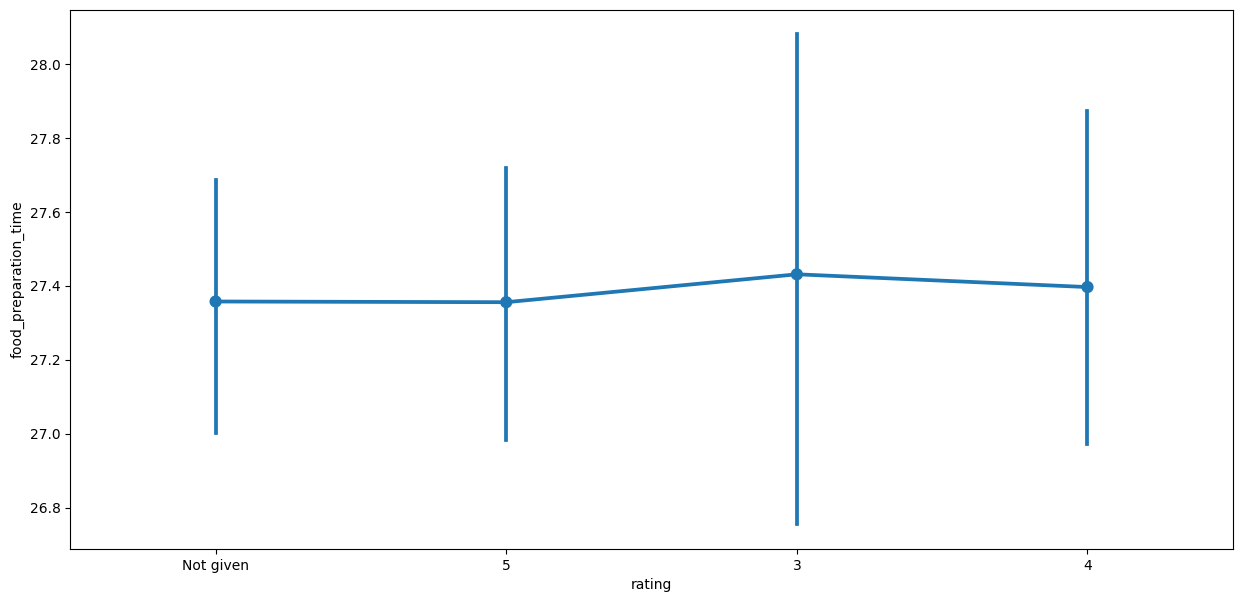

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = data)
plt.show()

Observations: The rating showed no correlation with food preparation time. This is likely because customers do not actually know the food preparation time, but may give a bad rating due to slow delivery time.

### Rating vs Cost of Order

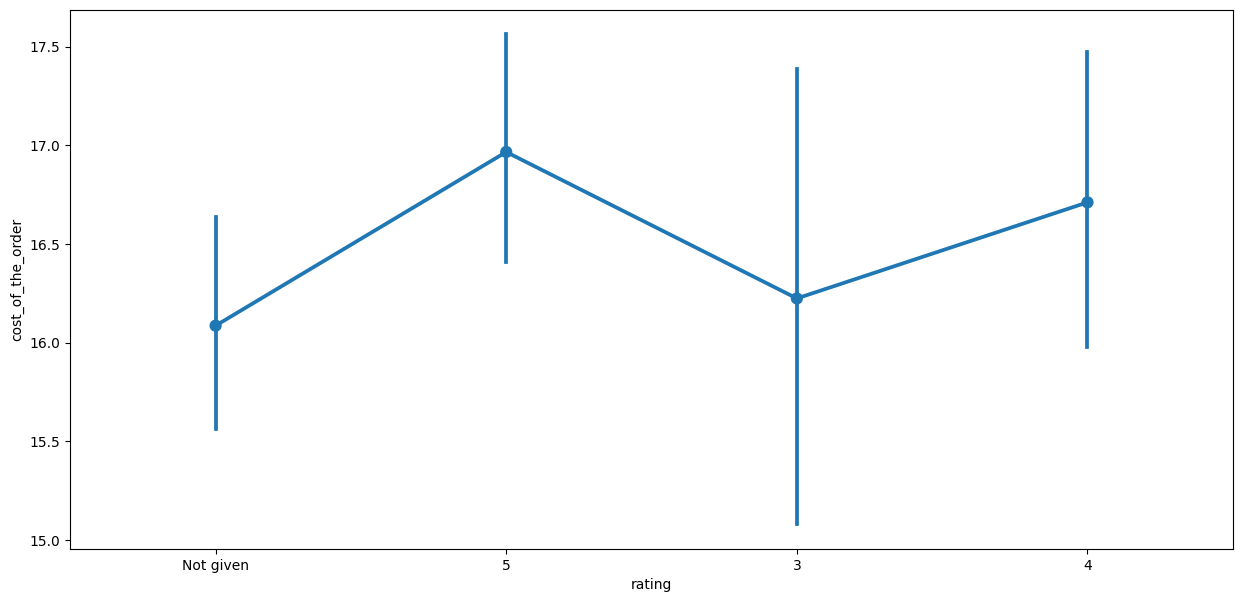

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = data)
plt.show()

Observations: It seems that as the cost of the order goes up, the rating also goes up. Customers may think that higher cost would mean an increased quality and warrant a higher rating.

### Correlation among Variables

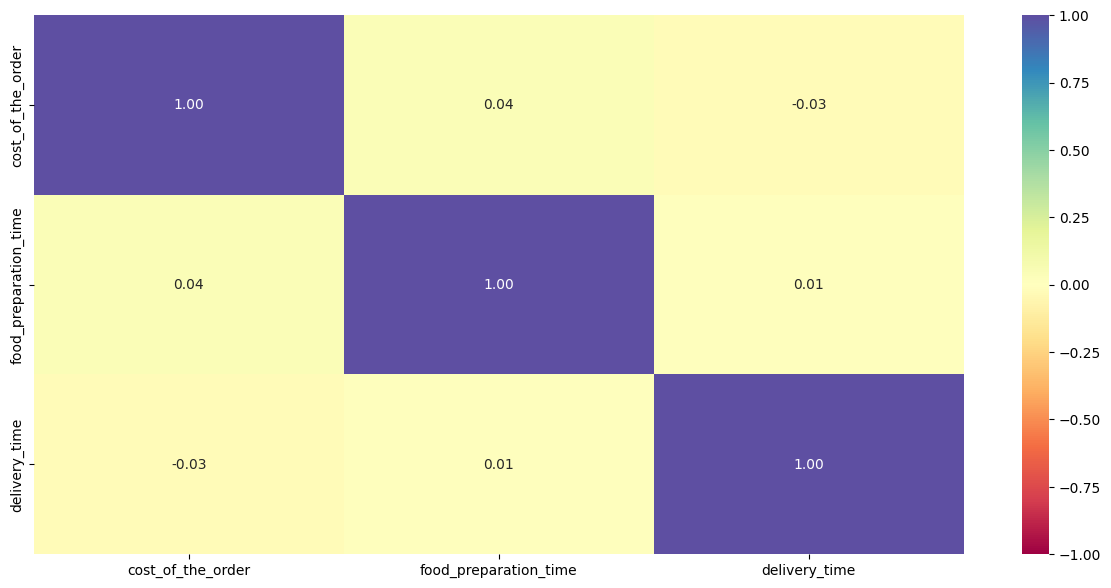

In [ ]:
column_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(data[column_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations: Based on the heat map, there is not a strong correlation between the cost of the order, food preparation time, and delivery time. It is safe to say that these variables are relatively independent of each other.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Must filter out "not given" ratings, copy to preserve original dataset
data_filtered = data[data['rating'] != 'Not given'].copy()

#Ratings are currently given as str, need to change to int
data_filtered['rating'] = data_filtered['rating'].astype('int')

#Group restaurants with rating count, reset indexes
data_restaurants = data_filtered.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

#Give only the restaurants with rating count above 50
restaurant_over_50 = data_restaurants[data_restaurants['rating'] > 50]['restaurant_name']

#Filter these restaurants with average rating above 4.
#Begin from filtered dataset again. Only keep orders from the restaurants in the list above. Copy to preserve.
data_average = data_filtered[data_filtered['restaurant_name'].isin(restaurant_over_50)].copy()

#Group data by restaurant name and take mean of each restaurant. Sort and reset indexes.
data_average.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: There are 4 restaurants with more than 50 ratings and an average rating of over 4.0:
- The Meatball Shop  
- Blue Ribbon Fried Chicken  
- Shake Shack  
- Blue Ribbon Sushi



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#Find net revenue for the company

#Function taking in the price of an order and returning revenue for that order
def calculate_rev(orderPrice):
  if orderPrice > 20:
    return orderPrice * 0.25
  elif orderPrice > 5:
    return orderPrice * 0.15
  else:
    return 0

#Create new column, revenue, with revenue of each order, use apply() method
data['revenue'] = data['cost_of_the_order'].apply(calculate_rev)

#Sum all the revenue, round to two digits
total_rev = data['revenue'].sum()
round(total_rev,2)


6166.3

#### Observations: The Total Revenue made by the company is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#Find percentage of orders that take more than 60 minutes to get delivered (both prep and delivery)

#Create new column as total time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()
#Find number of orderss that take more than 60 minutes

data_orders_over = data[data['total_time'] > 60]
num_orders_over = len(data_orders_over['order_id'])

#Divide number of orders over by total orders: 1898
total_orders = len(data['order_id'])
percentage = round((num_orders_over / total_orders) * 100,2)
print(percentage)



10.54


#### Observations: The percentage of orders that take more tha 60 minutes to get delivered from the time the order is places is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#Find mean delivery time of orders on weekdays and weekends

#Group dataset by day of the week, [delivery_time].mean()
avg_delivery_time = data.groupby(['day_of_the_week'])['delivery_time'].mean()
print(round(avg_delivery_time['Weekday'],2), 'Weekday')
print(round(avg_delivery_time['Weekend'],2), 'Weekend')


28.34 Weekday
22.47 Weekend


#### Observations: The average delivery time on the weekdays are 28.34 minutes, which is on average about 6 minutes slower than the average delivery time on the weekend, which is 22.47 minutes

---




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Analysis shows that the majority of order volumne comes on the weekend with the most popular cuisine being American.
*  Delivery time is considerably faster on the weekends which can be due to less traffic or more delivery drivers.
*  There is slight positive correlation between Cost of the Order and Rating, but there is no correlation between Cost of the Order and Food Preparation time or Delivery time.

### Recommendations:

*  Since FoodHub receives a fixed margin based on the size of the order, it maeks sense for Foodhub's goal to be garnering as many orders as possible. This can be acheived through promoting a discount deal targetting American Cusine on the weekends, attempting to garner attention and increase order volumne.
*  Another way FoodHub could increase its revenue is to revise the revenue scheme per order. Foodhub currently makes 25% on orders over 20 and 15% on orders over 5. Essentially all orders are over $5 so it could be more applicable to edit the spread. 30% on orders over 25 and 20% on orders over 10, and 10% on all orders under 10. This would capitalize on the largest amount of orders, which is 10-15 dollars, providing the most revenue for the company.
*  The last simplest form to increase order volume and therefore revenue is to target the weekday orders. Weekend orders are more popular, so providing a discount or a promotional deal on the weekdays could incentise customers to place more orders on the weekdays.

---

In [ ]:
%%shell
jupyter nbconvert --to html /content/Daniel_Lien_PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/Daniel_Lien_PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1146971 bytes to /content/Daniel_Lien_PYF_Project_LearnerNotebook_FullCode.html
